# Inagural Project - Household Specialization Model

Imports and set magics:

In [1]:
#Import package

import numpy as np
from types import SimpleNamespace

import numpy as np
from scipy import optimize

import pandas as pd 
import matplotlib.pyplot as plt

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
from inauguralproject import HouseholdSpecializationModelClass

# Question 1

Here, we illustrate how varying $\alpha$ and $\sigma$ values across the range of $\alpha \in [0.25, 0.5, 0.75]$ and $\sigma \in [0.5, 1, 1.5]$ affects the ratio of female to male hours of household work, $\frac{H_F}{H_M}$. We achieve this by employing the model.solve_discrete function from pw.py.

In [2]:
model = HouseholdSpecializationModelClass()

par = model.par

list_alpha = [0.25, 0.5, 0.75]
list_sigma = [0.5, 1.0, 1.5]

#Here we solve for the relationship between the hours for male and female for the different values of alpha and sigma

for i in list_sigma:
    par.sigma = i
    for j in list_alpha:
        par.alpha = j
        opt = model.solve_discrete()
        
        relative_hours = opt.HF/opt.HM
        print(f' sigma = {par.sigma:.2f} and alpha = {par.alpha:.2f}, H_F / H_M will be equal to: {relative_hours:.2f}')


 sigma = 0.50 and alpha = 0.25, H_F / H_M will be equal to: 0.55
 sigma = 0.50 and alpha = 0.50, H_F / H_M will be equal to: 1.00
 sigma = 0.50 and alpha = 0.75, H_F / H_M will be equal to: 1.83
 sigma = 1.00 and alpha = 0.25, H_F / H_M will be equal to: 0.31
 sigma = 1.00 and alpha = 0.50, H_F / H_M will be equal to: 1.00
 sigma = 1.00 and alpha = 0.75, H_F / H_M will be equal to: 3.25
 sigma = 1.50 and alpha = 0.25, H_F / H_M will be equal to: 0.21
 sigma = 1.50 and alpha = 0.50, H_F / H_M will be equal to: 1.00
 sigma = 1.50 and alpha = 0.75, H_F / H_M will be equal to: 4.67


To make it easier to read, we will present the information in the form of a table. The table will contain the same values as mentioned above, but in a more organized format. We will create the table by generating lists for the alpha values and sigma values, and then iterate over them as follows:

In [3]:
#Calculating a table with optimal relative hours worked at home 
model_1 = HouseholdSpecializationModelClass()
par = model_1.par
sol = model_1.sol

#List of paramters to solve for 
list_alpha = [0.25, 0.5, 0.75]
list_sigma = [0.5, 1.0, 1.5]

#Empty list to store the relative wage values
table_data = []

#Loop alpha values
for alpha in list_alpha:
    # row list for the current alpha value
    row_data = []
    
    #Loop  sigma values
    for sigma in list_sigma:
        # parameter values
        par.alpha = alpha
        par.sigma = sigma
        
        #Solve for optimal solution
        opt = model_1.solve_discrete()
        
        #Calculate relative wage and append to row list
        relative_wage = opt.HF / opt.HM
        row_data.append(relative_wage)
    
    #Append the row list to the table data list
    table_data.append(row_data)

#Create a pandas DataFrame from the table data
table = pd.DataFrame(table_data, index=list_alpha, columns=list_sigma)

#Print the table
print(table)
print("Note that (0.25, 0.50, and 0.75) are alpha values and (0.5, 1.0, and 1.5) are sigma values")

           0.5       1.0       1.5
0.25  0.545455  0.307692  0.214286
0.50  1.000000  1.000000  1.000000
0.75  1.833333  3.250000  4.666667
Note that (0.25, 0.50, and 0.75) are alpha values and (0.5, 1.0, and 1.5) are sigma values


Comments on the results:

When $\alpha$ increases, the relationship between $H_F$ and $H_M$ also increases (for a given value of $\sigma$). The intuition behind this is that the relationship in productivity at home between women and men (given by $\frac{\alpha}{1-\alpha}$) becomes greater as $\alpha$ increases. In other words, when $\alpha$ increases, women become more productive in the home and undertake more housework.

# Question 2

Here, we plot the logarithmic ratio of female to male hours of household work, $\frac{H_F}{H_M}$, against the logarithmic ratio of female to male wages, $\frac{w_F}{w_M}$, while varying the female wage across the values: $w_F \in [0.8, 0.9, 1.0, 1.1, 1.2]$. We accomplish this using the same model as mentioned earlier, specifically the solve_discrete function from pw.py.

In [4]:
model_2 = HouseholdSpecializationModelClass()

par = model_2.par

results_q2 = []

#Here we solve the model dicretly for different relationships between WF og WM 
for i in par.wF_vec:
    par.wF = i
    opt = model_2.solve_discrete()
        
    relative_hours = opt.HF/opt.HM
    log_relative_h = np.log(relative_hours)
    results_q2 = np.append(results_q2, log_relative_h)
    print(f'For a relative wage ratio of {i:2f} the optimal relative hours at home are (HF / HM) {relative_hours:3f}')

For a relative wage ratio of 0.800000 the optimal relative hours at home are (HF / HM) 1.250000
For a relative wage ratio of 0.900000 the optimal relative hours at home are (HF / HM) 1.000000
For a relative wage ratio of 1.000000 the optimal relative hours at home are (HF / HM) 1.000000
For a relative wage ratio of 1.100000 the optimal relative hours at home are (HF / HM) 0.888889
For a relative wage ratio of 1.200000 the optimal relative hours at home are (HF / HM) 0.800000


We now construct a figure displaying the results above:

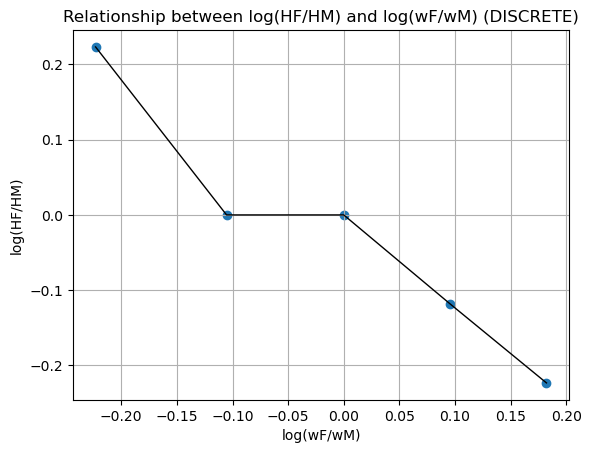

In [5]:
#Create figure
fig = plt.figure()
#Create plot
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.log(par.wF_vec), results_q2, color='black', lw=1)
ax.scatter(np.log(par.wF_vec), results_q2)
#Alterations to figure
ax.grid()
ax.set_xlabel("log(wF/wM)")
ax.set_ylabel("log(HF/HM)")
ax.set_title("Relationship between log(HF/HM) and log(wF/wM) (DISCRETE)")
plt.show()

Comments on the result:

Consistent with our expectations, the ratio of female hours worked ($H_F$) to male hours worked ($H_M$) decreases as the ratio of female wages ($W_F$) to male wages ($W_M$) increases. This implies that when a woman's wage increases relative to a man's wage, her contribution to household work diminishes. This phenomenon can be attributed to the fact that with higher wages, women have a greater incentive to engage in paid employment rather than domestic tasks. The opportunity cost of domestic work becomes higher, and women opt to allocate more time to paid work, which increases their overall utility by allowing them to earn income for consumption.

It is worth noting that there is a breakpoint around $\log(H_F/H_M)=0$ in the plot. This is due to the discretized formulation of the model's choice set, which is based on half-hour increments.

# Question 3

As we are now solving the model in a continuous setting, the setup is quite similar to Q2. We will skip the part of printing the relative hours and proceed directly to plotting. We believe that visualizing the relative hours in a continuous setting is the most effective way to demonstrate the results. 

However, if one desires to examine the exact values, they can be easily printed using the commands #print(relative_wage) and #print(relative_hours).

Text(0.5, 1.0, 'Relationship between log(HF / HM) and log(wF / wM) (CONTINUOUSLY)')

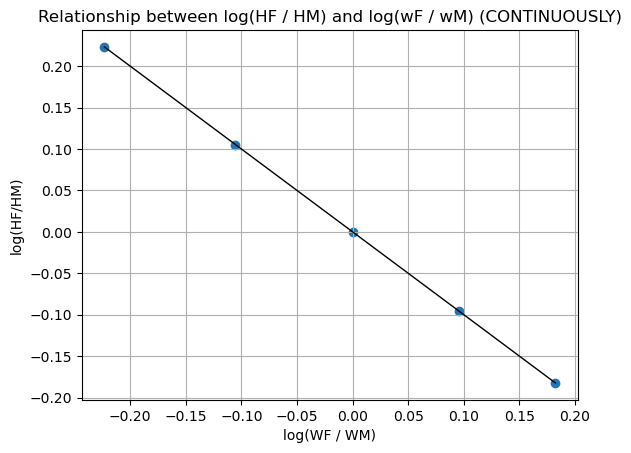

In [6]:
#Create figure
model_3 = HouseholdSpecializationModelClass()
par = model_3.par
sol = model_3.sol

model_3.solve_wF_vec_2

relative_hours = np.log(model_3.solve_wF_vec() )
relative_wage = np.log(par.wF_vec / par.wM)


fig = plt.figure()
#Create plot
ax = fig.add_subplot(1, 1, 1)
ax.plot(relative_wage, relative_hours, color='black', lw=1)
ax.scatter(relative_wage, relative_hours)
#Alterations to figure
ax.grid(True)
plt.xlabel('log(WF / WM)')
plt.ylabel('log(HF/HM)')
ax.set_title("Relationship between log(HF / HM) and log(wF / wM) (CONTINUOUSLY)")

In the continuous setting, we observe a similar trend as in the discrete case, with the ratio of female hours worked to male hours worked decreasing as the logarithmic ratio of female to male wages increases. However, unlike in the discrete case, there is no distinct "breakpoint" around $\log(H_F/H_M)=0$ in the continuous setting. This is because agents can now make more refined and continuous choices about their time allocation, leading to a smoother relationship between the wage ratio and the hours worked ratio.

# Question 4

Here, we construct an error function, $Error = (\beta_0 - \hat{\beta}_0)^2 + (\beta_1 - \hat{\beta}_1)^2$, and employ the numerical minimizer scipy.minimize with the Nelder-Mead method. This allows us to determine the values of $\alpha$ and $\sigma$ that minimize the error function.

The Nelder-Mead method is an optimization algorithm that searches for the minimum of a function without requiring gradient information. It iteratively adjusts a simplex, a set of points in the parameter space, based on function evaluations to converge towards the minimum.

In [7]:
model_4 = HouseholdSpecializationModelClass()

model_4.estimate()

c:\Users\Bruger\OneDrive\Skrivebord\projects-2023-fmw786\inauguralproject\inauguralproject.py:70: RuntimeWarning: overflow encountered in double_scalars
  inner = (1-par.alpha)*HM**((par.sigma-1)/par.sigma) +par.alpha*HF**((par.sigma-1)/par.sigma)


Minimizing the squared errrors gives the regression:
    Beta0_hat =  0.40
    Beta1_hat =  -0.10
This gives the parameters: 
    alpha = 0.98 
    sigma = 0.10
 With the squared error 0.00


Comments on the results:

The estimation results indicate that the estimated values closely match the Siminski and Yetsenga (2022) values. The estimated value for $\beta_0$, $\hat{\beta}_0=0.40$, aligns well with the true value of $\beta_0=0.4$. This suggests that, as a baseline, the hours worked by females ($H_F$) are larger than the hours worked by males ($H_M$).

Regarding $\beta_1$, the estimated value $\hat{\beta}_1=-0.10$ corresponds to the true value of $\beta_1=-0.10$. This implies that a 10% increase in the ratio of female wages to male wages ($\frac{w_F}{w_M}$) leads to a 1% decrease in the ratio of female hours worked to male hours worked ($\frac{H_F}{H_M}$). In other words, for every 10% increase in the wage ratio, the relative household workload shifts by approximately 1/10th of the magnitude by which the wage ratio has changed.

These results highlight the relationship between wage differentials and the division of household work, demonstrating how changes in wages can influence the distribution of domestic responsibilities between genders.

# Question 5

To extend our model and account for additional disutility in male household work ($H_M$) to fit the model for $\alpha = 0.5$, we modify the disutility function as follows:

$$
\nu \cdot \left( \frac{T_M^{1+ \frac{1}{\epsilon}}}{1 + \frac{1}{\epsilon}} + \frac{T_F^{1+ \frac{1}{\epsilon}}}{1 + \frac{1}{\epsilon}} + \varphi \cdot H_M \right)
$$

Next, we set $\alpha = 0.5$ and perform the same regression as in Question 4. However, this time we minimize the error function with respect to the parameters $\sigma$ and $\varphi$.

By adjusting the disutility function and including the parameter $\varphi$, we introduce an additional factor that captures the extra disutility associated with male household work. The coefficient $\varphi$ determines the weight of this extra disutility relative to other components in the disutility function.

In the regression process, we aim to find the values of $\sigma$ and $\varphi$ that minimize the error function, ensuring that the model aligns with the specified $\alpha$ value of 0.5. This adjustment allows us to explore how the inclusion of extra disutility for male household work impacts the model's fit and the overall distribution of household responsibilities.

In [8]:
model_5 = HouseholdSpecializationModelClass()

# fix alpha at 0.5
par.alpha = 0.5

model_5.estimate_5()

Minimizing the squared errrors gives the regression:
    Beta0_hat =  0.40
    Beta1_hat =  -0.10
This gives the parameters: 
    Fixed: alpha = 0.50 
    sigma = 0.20 
    phi = 55.95
 With the squared error 0.00


In our attempts to fit the model with $\alpha = 0.5$, while keeping the same $\beta$ values, we were able to minimize the error function by setting $\sigma = 0.20$ and $\varphi = 55.95$. However, we note that the value of $\varphi$ is unrealistically high, as it places an excessive amount of disutility on male household work. 

These findings suggest that in order to fit the model with $\alpha = 0.5$, we had to make unrealistic assumptions about the parameters. The high value of $\varphi$ indicates an exaggerated level of disutility specifically assigned to male household work. Such an assumption may not align with real-world scenarios and expectations.

This highlights the importance of considering realistic parameter values and the implications they have on the model's fit and interpretation. While we were able to achieve the desired value of $\alpha$, the associated parameter assumptions deviate from reasonable expectations. It suggests that fitting the model to a specific value of $\alpha$ may require a different extension to the disutility function (or other parts of the model) than the one we implemented.

# Conclusion

In this assignment, we examined the relationship between gender, wages, and the distribution of household work using a model with parameterized utility functions. We started by considering the impact of wage differentials on the allocation of domestic responsibilities.

Through regression analysis and numerical minimization techniques such as the Nelder-Mead method, we estimated the parameters and observed their effects on the model's performance. We found that an increase in the ratio of female to male wages led to a decrease in the ratio of female to male hours of household work, reflecting a shift in the division of domestic labor.

Moreover, we explored the limitations and challenges of fitting the model to specific values of $\alpha$, highlighting the need for careful consideration of realistic parameter assumptions. We encountered instances where achieving the desired value of $\alpha$ required unrealistic parameter values.

Overall, this assignment shed light on the complex dynamics between gender, wages, and household work distribution. By incorporating economic principles and optimization techniques, we gained insights into how wage differentials impact individuals' decision-making regarding work and domestic responsibilities.